Câu 4

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. ĐỌC DỮ LIỆU TỪ FILE CSV
# File được ngăn cách bởi dấu phẩy (,)
df = pd.read_csv('winequality-red.csv')

# Kiểm tra nhanh dữ liệu
print("--- 5 dòng đầu tiên của dữ liệu ---")
print(df.head())

# 2. TÁCH BIẾN ĐẦU VÀO (X) VÀ NHÃN MỤC TIÊU (y)
# Mục tiêu là dự đoán 'quality' (chất lượng rượu)
X = df.drop('quality', axis=1)  # Các chỉ số hóa lý (Input)
y = df['quality']               # Chất lượng rượu (Output)

# 3. CHIA DỮ LIỆU (SPLIT DATA)
# Tỷ lệ: 70% Train - 30% Test
# random_state=42: Đảm bảo kết quả chia cố định
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. HIỂN THỊ KẾT QUẢ KÍCH THƯỚC
print("\n--------- KẾT QUẢ CHIA DỮ LIỆU ---------")
print(f"Tổng số mẫu ban đầu: {len(df)}")
print(f"Số lượng tập Huấn luyện (Train - 70%): {X_train.shape[0]} mẫu")
print(f"Số lượng tập Kiểm thử (Test - 30%):    {X_test.shape[0]} mẫu")

# Kiểm tra số lượng cột (đặc trưng)
print(f"Số lượng đặc trưng (Features):         {X_train.shape[1]}")
print("Nguyễn Đình Vương - 6351071081\n")

--- 5 dòng đầu tiên của dữ liệu ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1     

Câu 4.3

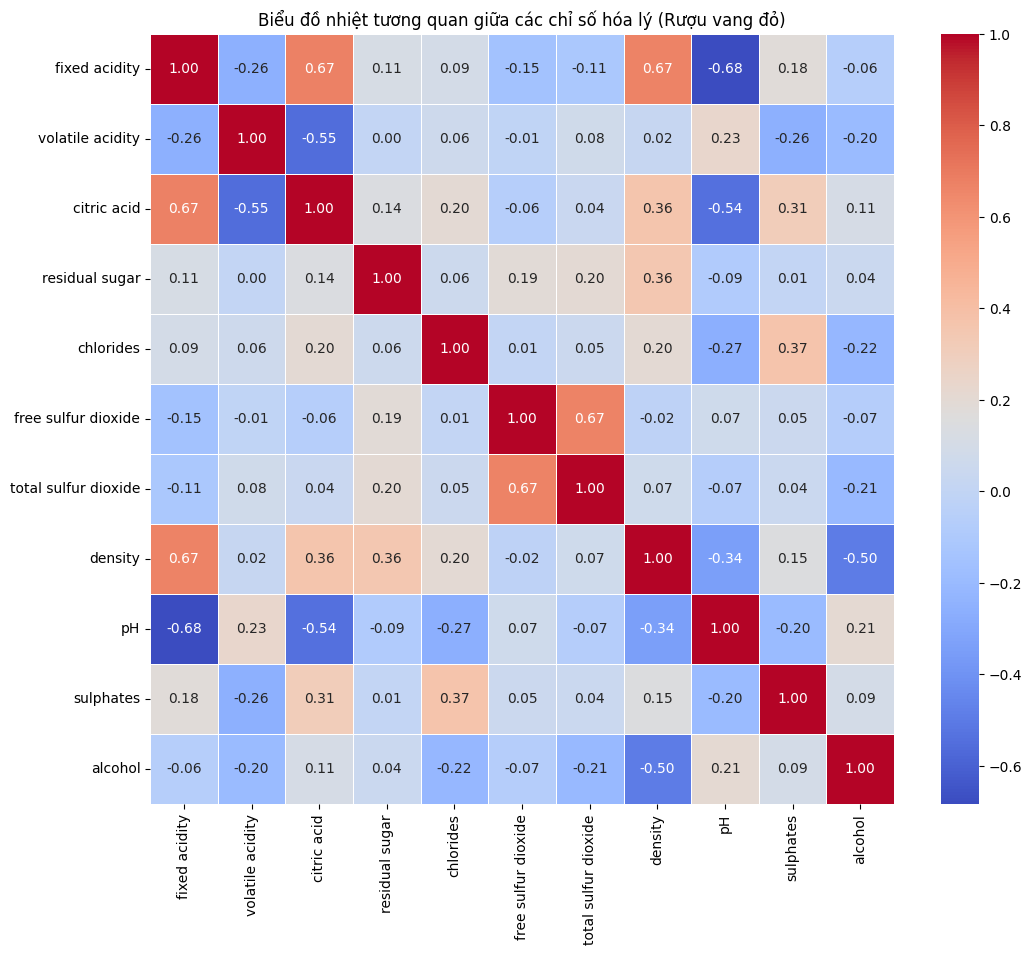

---------------- KẾT QUẢ KHẢO SÁT ----------------
Không có cột nào có độ tương đồng > 0.7. Giữ nguyên dữ liệu.

--- 5 dòng đầu của dữ liệu sau khi giảm chiều ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58  

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. ĐỌC DỮ LIỆU
df = pd.read_csv('winequality-red.csv')

# Tách riêng các biến đầu vào (Features) để khảo sát
# (Chúng ta không loại bỏ cột 'quality' vì nó là đích đến, chỉ xét sự trùng lặp giữa các input)
X = df.drop('quality', axis=1)

# 2. TÍNH MA TRẬN TƯƠNG QUAN PEARSON
corr_matrix = X.corr(method='pearson')

# Vẽ biểu đồ nhiệt (Heatmap) để quan sát trực quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Biểu đồ nhiệt tương quan giữa các chỉ số hóa lý (Rượu vang đỏ)")
plt.show()

# 3. THUẬT TOÁN TỰ ĐỘNG TÌM VÀ LOẠI BỎ CỘT TƯƠNG ĐỒNG CAO
# Ngưỡng (Threshold): Thường chọn 0.7 (tương đương 70% giống nhau)
threshold = 0.7

# Lấy tam giác trên của ma trận tương quan (để không duyệt trùng lặp)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Tìm các cột có tương quan > threshold (xét trị tuyệt đối)
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print("---------------- KẾT QUẢ KHẢO SÁT ----------------")
if len(to_drop) > 0:
    print(f"Phát hiện {len(to_drop)} cột có độ tương đồng cao (trên {threshold}):")
    for col in to_drop:
        # Tìm xem nó trùng với cột nào
        correlated_with = upper.index[upper[col].abs() > threshold].tolist()
        print(f" - Cột '{col}' tương đồng cao với: {correlated_with} --> ĐỀ XUẤT XÓA")

    # Tiến hành loại bỏ
    df_reduced = df.drop(columns=to_drop)
    print(f"\nĐã loại bỏ các cột: {to_drop}")
    print(f"Kích thước dữ liệu cũ: {df.shape}")
    print(f"Kích thước dữ liệu mới: {df_reduced.shape}")
else:
    print(f"Không có cột nào có độ tương đồng > {threshold}. Giữ nguyên dữ liệu.")
    df_reduced = df

# Xem qua dữ liệu mới
print("\n--- 5 dòng đầu của dữ liệu sau khi giảm chiều ---")
print(df_reduced.head())
print("Nguyễn Đình Vương - 6351071081\n")

Câu 4.4

In [13]:
import pandas as pd

# 1. Đọc dữ liệu
df = pd.read_csv('winequality-red.csv')

# 2. Tách dữ liệu
# Phần X: Chứa các thuộc tính bình thường (Loại bỏ cột quality)
X = df.drop('quality', axis=1)

# Phần y: Chứa riêng thuộc tính quyết định (Cột quality)
y = df['quality']

# 3. Hiển thị kết quả kiểm tra
print("--- PHẦN 1: CÁC THUỘC TÍNH ĐẦU VÀO (X) ---")
print(f"Kích thước tập X: {X.shape}")
print(X.head()) # Xem 5 dòng đầu

print("\n\n--- PHẦN 2: THUỘC TÍNH QUYẾT ĐỊNH (y) ---")
print(f"Kích thước tập y: {y.shape}")
print(y.head()) # Xem 5 dòng đầu
print("Nguyễn Đình Vương - 6351071081\n")

--- PHẦN 1: CÁC THUỘC TÍNH ĐẦU VÀO (X) ---
Kích thước tập X: (1599, 11)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0

Câu 4.5

In [14]:
import pandas as pd

# 1. ĐỌC DỮ LIỆU
df = pd.read_csv('winequality-red.csv')

# 2. KIỂM TRA KIỂU DỮ LIỆU BAN ĐẦU
print("--- Kiểu dữ liệu của các cột (Trước khi xử lý) ---")
print(df.dtypes)

# 3. TÁCH BIẾN ĐẦU VÀO (X) VÀ NHÃN (y)
X = df.drop('quality', axis=1)
y = df['quality']

# 4. ÁP DỤNG ONE-HOT ENCODING
# Hàm này sẽ quét toàn bộ bảng X, cột nào không phải số sẽ bị biến đổi
X_encoded = pd.get_dummies(X)

# 5. HIỂN THỊ KẾT QUẢ SO SÁNH
print("\n--------- KẾT QUẢ CHUYỂN ĐỔI ---------")
print(f"Kích thước ban đầu của X:    {X.shape}")
print(f"Kích thước sau One-Hot của X:{X_encoded.shape}")

if X.shape == X_encoded.shape:
    print("\n[NHẬN XÉT QUAN TRỌNG]:")
    print("Kích thước không đổi. Điều này chứng tỏ bộ dữ liệu Rượu vang này HOÀN TOÀN LÀ SỐ.")
    print("Chúng ta không cần lo lắng về dữ liệu dạng chữ (String) nữa.")
else:
    print(f"\n[THÀNH CÔNG]: Đã chuyển đổi các cột dạng chữ sang dạng số.")

print("\n--- 5 dòng đầu của dữ liệu chuẩn bị đưa vào thư viện ---")
print(X_encoded.head())
print("Nguyễn Đình Vương - 6351071081\n")

--- Kiểu dữ liệu của các cột (Trước khi xử lý) ---
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

--------- KẾT QUẢ CHUYỂN ĐỔI ---------
Kích thước ban đầu của X:    (1599, 11)
Kích thước sau One-Hot của X:(1599, 11)

[NHẬN XÉT QUAN TRỌNG]:
Kích thước không đổi. Điều này chứng tỏ bộ dữ liệu Rượu vang này HOÀN TOÀN LÀ SỐ.
Chúng ta không cần lo lắng về dữ liệu dạng chữ (String) nữa.

--- 5 dòng đầu của dữ liệu chuẩn bị đưa vào thư viện ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00   

Câu 4.6

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. CHUẨN BỊ DỮ LIỆU (Giả sử các bước trước đã chạy)
# Đọc lại và xử lý nhanh để đảm bảo code này chạy độc lập được
df = pd.read_csv('winequality-red.csv')
X = df.drop('quality', axis=1)
y = df['quality']
X_encoded = pd.get_dummies(X) # Dù không thay đổi gì với dữ liệu này nhưng giữ đúng quy trình

# 2. CHIA TÁCH DỮ LIỆU (TRAIN / TEST SPLIT)
# test_size=0.3 tương ứng với 30% cho kiểm thử
# random_state=42 giúp giữ cố định kết quả chia
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 3. HIỂN THỊ KẾT QUẢ CHI TIẾT
print("--------- KẾT QUẢ TÁCH DỮ LIỆU (70/30) ---------")
print(f"1. Tổng số mẫu ban đầu: {len(df)}")
print(f"2. Tập Huấn luyện (X_train): {X_train.shape[0]} dòng (70%)")
print(f"3. Tập Kiểm thử   (X_test):  {X_test.shape[0]} dòng (30%)")
print(f"4. Số lượng đặc trưng (Cột Input): {X_train.shape[1]}")

print("\n--- Xem thử 5 dòng trong tập Huấn luyện ---")
print(X_train.head())

print("\n--- Xem thử 5 nhãn tương ứng ---")
print(y_train.head())
print("Nguyễn Đình Vương - 6351071081\n")

--------- KẾT QUẢ TÁCH DỮ LIỆU (70/30) ---------
1. Tổng số mẫu ban đầu: 1599
2. Tập Huấn luyện (X_train): 1119 dòng (70%)
3. Tập Kiểm thử   (X_test):  480 dòng (30%)
4. Số lượng đặc trưng (Cột Input): 11

--- Xem thử 5 dòng trong tập Huấn luyện ---
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
925             8.6              0.22         0.36             1.9      0.064   
363            12.5              0.46         0.63             2.0      0.071   
906             7.2              0.54         0.27             2.6      0.084   
426             6.4              0.67         0.08             2.1      0.045   
1251            7.5              0.58         0.14             2.2      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
925                  53.0                  77.0  0.99604  3.47       0.87   
363                   6.0                  15.0  0.99880  2.99       0.87   
906                  12.0       

Câu 4.7

Độ chính xác (Accuracy): 59.79%

Ma trận nhầm lẫn (Confusion Matrix):
[[  0   0   1   0   0   0]
 [  0   2   5   9   1   0]
 [  2  15 130  43   5   0]
 [  0   6  43 125  25   1]
 [  0   0   3  27  28   3]
 [  0   0   2   0   2   2]]


<Figure size 800x600 with 0 Axes>

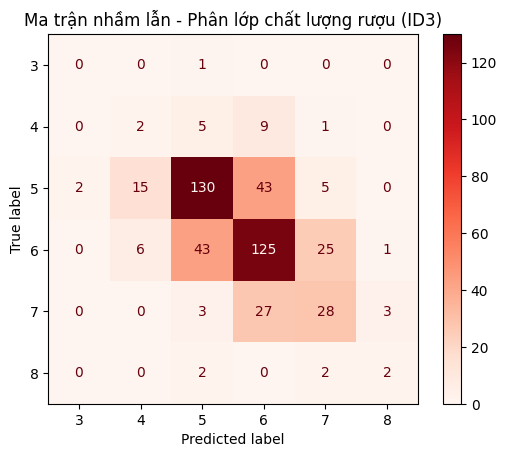

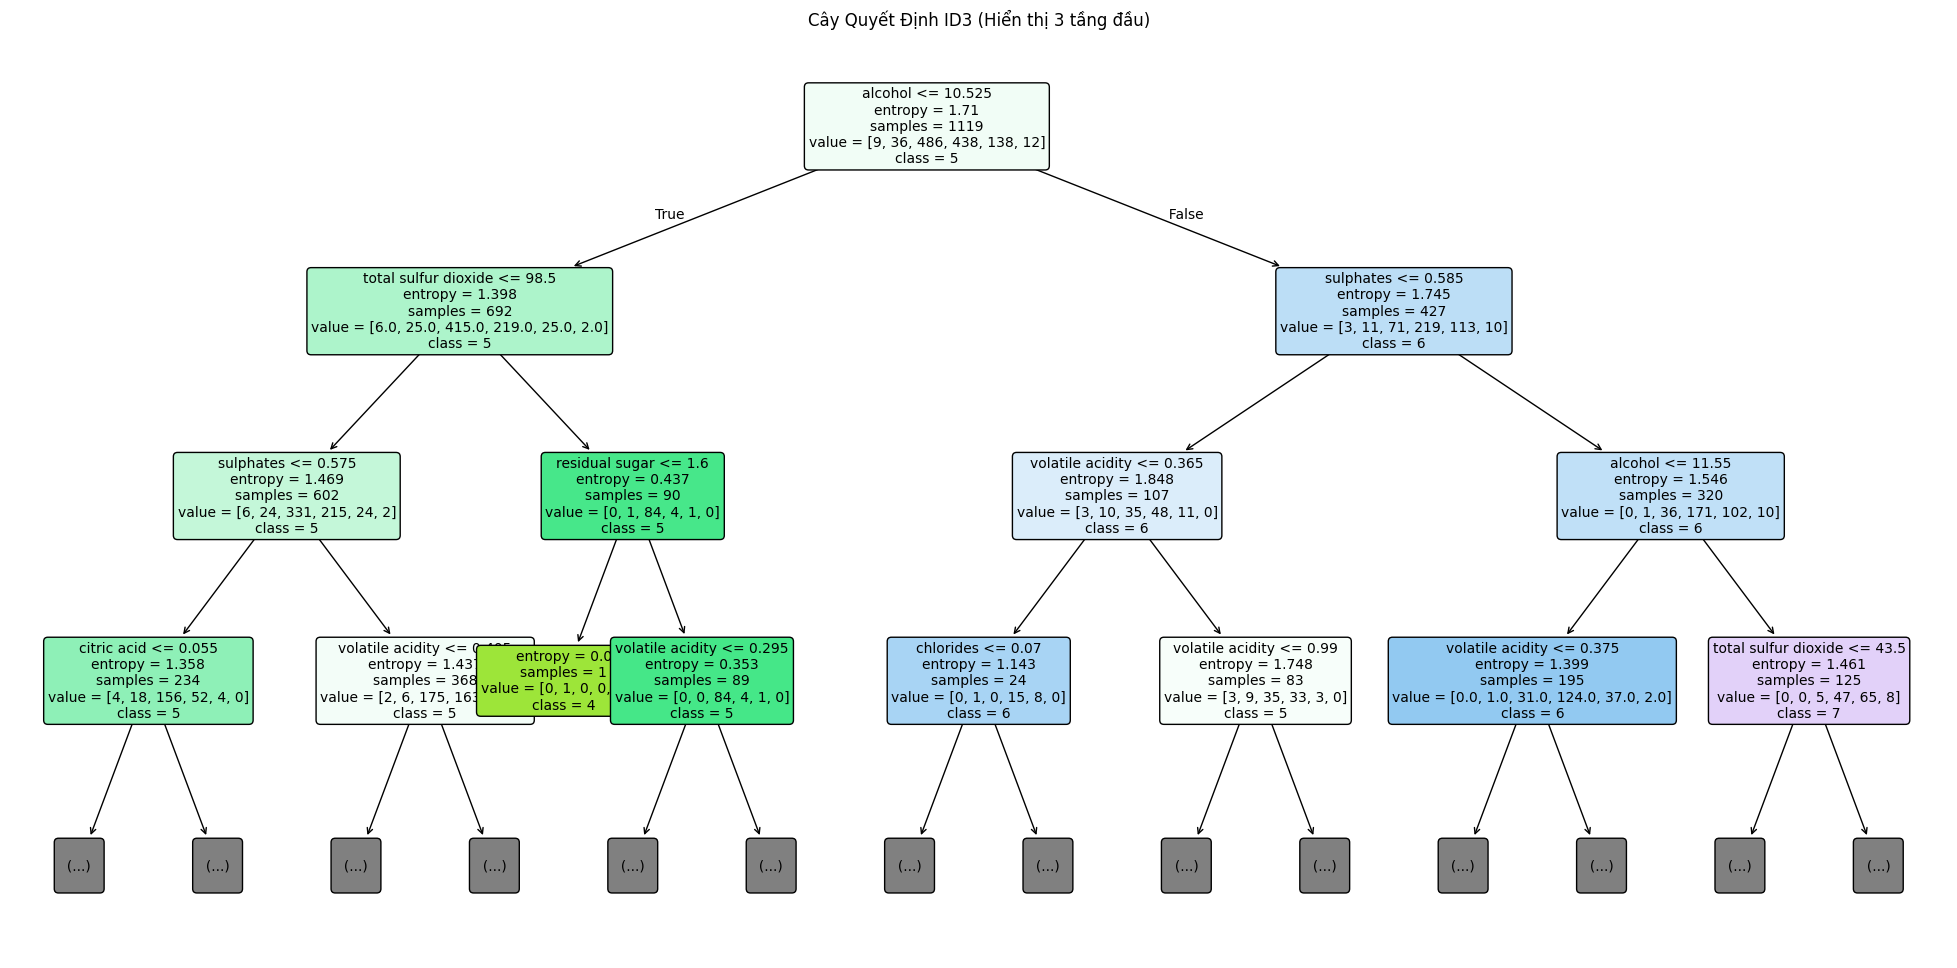

Nguyễn Đình Vương - 6351071081



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# --- 1. CHUẨN BỊ DỮ LIỆU ---
# Đọc file
df = pd.read_csv('winequality-red.csv')

# Tách X và y
X = df.drop('quality', axis=1)
y = df['quality']

# Chia dữ liệu 70% Train - 30% Test (như yêu cầu trước)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. XÂY DỰNG MÔ HÌNH CÂY ID3 (ENTROPY) ---
# criterion='entropy': Sử dụng độ lợi thông tin (giống thuật toán ID3)
# random_state=42: Giữ cố định kết quả
clf_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_id3.fit(X_train, y_train)

# --- 3. KIỂM THỬ VÀ ĐÁNH GIÁ ---
# Dự đoán trên tập kiểm thử
y_pred = clf_id3.predict(X_test)

# Tính độ chính xác tổng thể
acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy): {acc * 100:.2f}%")

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("\nMa trận nhầm lẫn (Confusion Matrix):")
print(cm)

# --- 4. BIỂU DIỄN KẾT QUẢ ---

# A. Vẽ Ma trận nhầm lẫn
# Lấy danh sách các nhãn thực tế có trong tập test (để gán nhãn cho biểu đồ)
unique_labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap='Reds', values_format='d') # cmap='Reds' cho đúng chủ đề rượu vang
plt.title("Ma trận nhầm lẫn - Phân lớp chất lượng rượu (ID3)")
plt.show()

# B. Vẽ Cây quyết định
# Lưu ý: Cây đầy đủ rất lớn (sâu và rộng), ta chỉ vẽ 3 tầng đầu tiên (max_depth=3)
# để hình ảnh dễ nhìn và đưa vào báo cáo.
plt.figure(figsize=(25, 12))
plot_tree(clf_id3,
          feature_names=X.columns,
          class_names=[str(i) for i in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)
plt.title("Cây Quyết Định ID3 (Hiển thị 3 tầng đầu)")
plt.show()
print("Nguyễn Đình Vương - 6351071081\n")

Câu 4.8

--------- KẾT QUẢ MÔ HÌNH CART (GINI) ---------
Độ chính xác (Accuracy): 57.29%

Ma trận nhầm lẫn (Dạng số):
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  1   8 126  58   2   0]
 [  0   5  48 121  26   0]
 [  0   1   6  26  26   2]
 [  0   0   0   3   2   1]]


<Figure size 800x600 with 0 Axes>

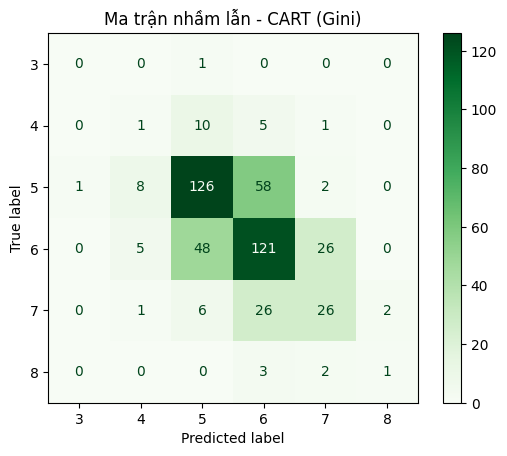

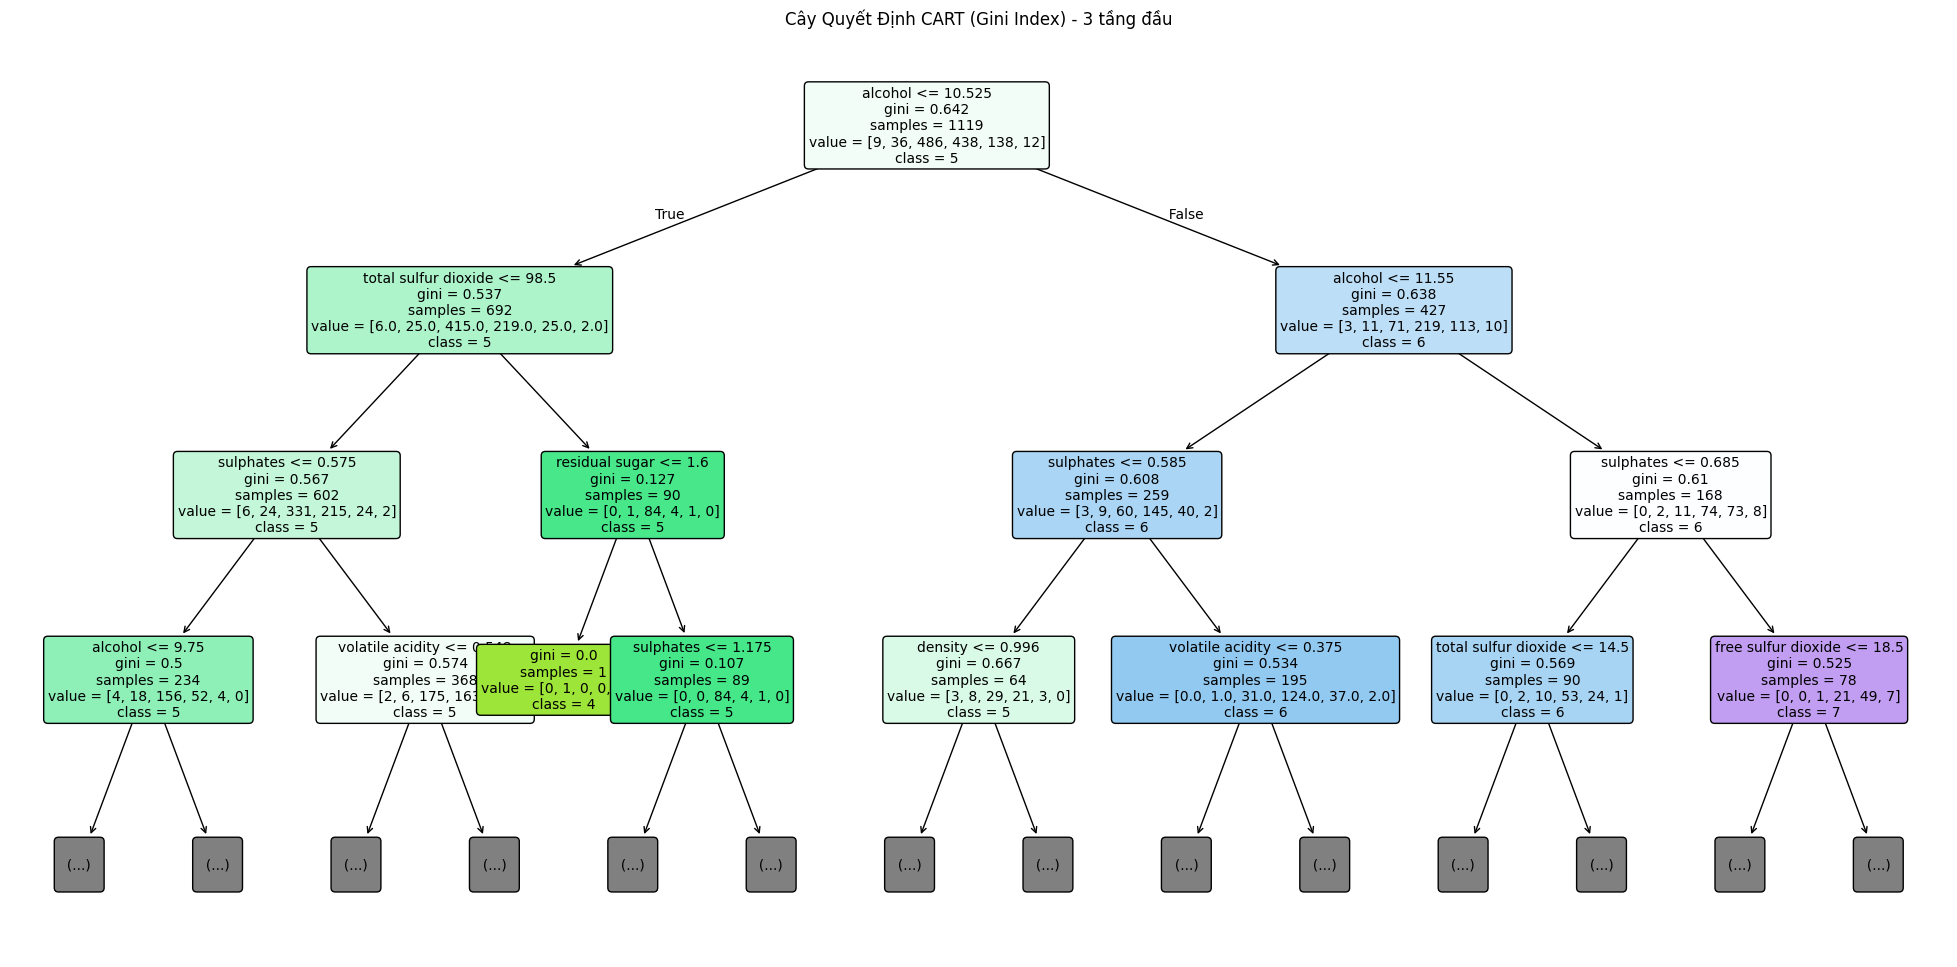

Nguyễn Đình Vương - 6351071081



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# --- 1. CHUẨN BỊ DỮ LIỆU ---
# Đọc file dữ liệu
df = pd.read_csv('winequality-red.csv')

# Tách biến đầu vào (X) và biến mục tiêu (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Chia dữ liệu: 70% Huấn luyện - 30% Kiểm thử (random_state=42 để cố định kết quả)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. XÂY DỰNG MÔ HÌNH CART (GINI) ---
# criterion='gini': Đặc trưng của thuật toán CART để đo độ vẩn đục
clf_cart = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_cart.fit(X_train, y_train)

# --- 3. KIỂM THỬ VÀ ĐÁNH GIÁ ---
# Dự đoán trên tập kiểm thử
y_pred = clf_cart.predict(X_test)

# Tính độ chính xác
acc = accuracy_score(y_test, y_pred)
print(f"--------- KẾT QUẢ MÔ HÌNH CART (GINI) ---------")
print(f"Độ chính xác (Accuracy): {acc * 100:.2f}%")

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("\nMa trận nhầm lẫn (Dạng số):")
print(cm)

# --- 4. BIỂU DIỄN KẾT QUẢ TRỰC QUAN ---

# A. Vẽ Ma trận nhầm lẫn (Confusion Matrix)
unique_labels = sorted(y_test.unique()) # Lấy danh sách các nhãn lớp (3,4,5,6,7,8)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap='Greens', values_format='d') # Dùng màu xanh (Green) để phân biệt với ID3
plt.title("Ma trận nhầm lẫn - CART (Gini)")
plt.show()

# B. Vẽ Cây quyết định (Tree Visualization)
# Lưu ý: Cây rượu vang rất lớn, chỉ hiển thị 3 tầng đầu (max_depth=3) để báo cáo dễ nhìn
plt.figure(figsize=(25, 12))
plot_tree(clf_cart,
          feature_names=X.columns,
          class_names=[str(i) for i in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)
plt.title("Cây Quyết Định CART (Gini Index) - 3 tầng đầu")
plt.show()
print("Nguyễn Đình Vương - 6351071081\n")

Câu 4.9

--------- KẾT QUẢ ĐÁNH GIÁ (NAÏVE BAYES) ---------
Độ chính xác (Accuracy): 54.17%

Báo cáo chi tiết (Classification Report):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



<Figure size 800x600 with 0 Axes>

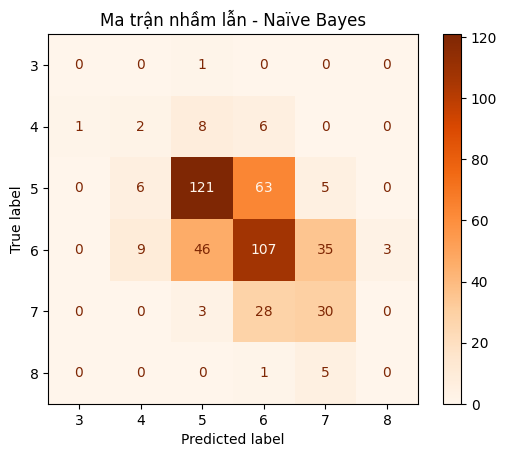

Nguyễn Đình Vương - 6351071081



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# --- 1. CHUẨN BỊ DỮ LIỆU ---
# Đọc file
df = pd.read_csv('winequality-red.csv')

# Tách X và y
X = df.drop('quality', axis=1)
y = df['quality']

# Chia dữ liệu 70% Train - 30% Test (như yêu cầu ban đầu)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. HUẤN LUYỆN MÔ HÌNH NAÏVE BAYES ---
# Sử dụng GaussianNB vì dữ liệu là số thực liên tục
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# --- 3. KIỂM TRA KẾT QUẢ ---
# Dự đoán trên tập kiểm thử
y_pred = model_nb.predict(X_test)

# A. Độ chính xác tổng thể
acc = accuracy_score(y_test, y_pred)
print(f"--------- KẾT QUẢ ĐÁNH GIÁ (NAÏVE BAYES) ---------")
print(f"Độ chính xác (Accuracy): {acc * 100:.2f}%")

# B. Báo cáo chi tiết từng lớp
# (Giúp xem độ chính xác riêng cho từng loại rượu 3, 4, 5...)
print("\nBáo cáo chi tiết (Classification Report):")
print(classification_report(y_test, y_pred, zero_division=0))

# C. Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(y_test.unique())

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap='Oranges', values_format='d')
plt.title("Ma trận nhầm lẫn - Naïve Bayes")
plt.show()
print("Nguyễn Đình Vương - 6351071081\n")

Câu 4.10

--------- BẢNG SO SÁNH KẾT QUẢ ---------
             Mô hình  Độ chính xác (Accuracy)  F1-Score (%)
0  Cây ID3 (Entropy)                59.791667     60.257388
1    Cây CART (Gini)                57.291667     57.036286
2        Naïve Bayes                54.166667     54.326510


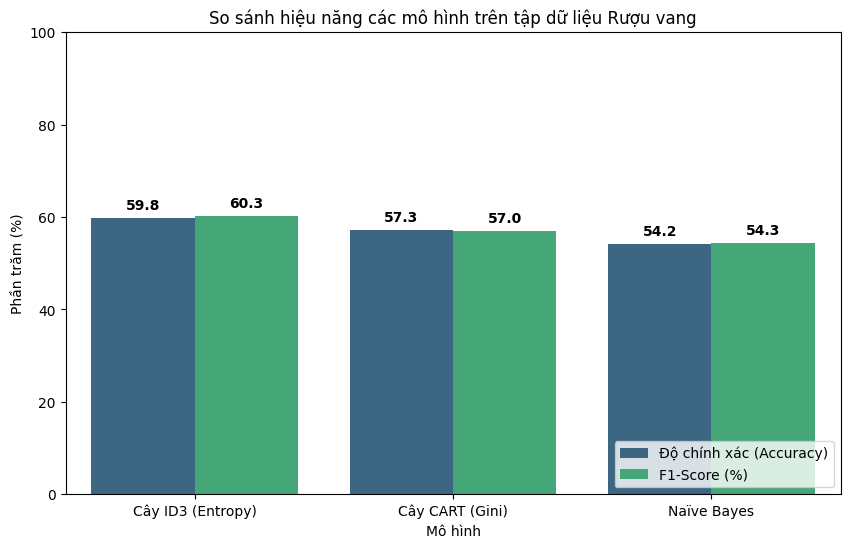

Nguyễn Đình Vương - 6351071081



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

# --- 1. CHUẨN BỊ DỮ LIỆU ---
df = pd.read_csv('winequality-red.csv')
X = df.drop('quality', axis=1)
y = df['quality']

# Chia dữ liệu 70/30 cố định
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. KHỞI TẠO CÁC MÔ HÌNH ---
models = {
    "Cây ID3 (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "Cây CART (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "Naïve Bayes": GaussianNB()
}

# --- 3. HUẤN LUYỆN VÀ ĐÁNH GIÁ ---
results = []

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính toán chỉ số
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # Dùng weighted vì dữ liệu lệch

    results.append({
        "Mô hình": name,
        "Độ chính xác (Accuracy)": acc * 100,
        "F1-Score (%)": f1 * 100
    })

# Chuyển kết quả sang DataFrame để dễ xem
df_results = pd.DataFrame(results)

# --- 4. HIỂN THỊ VÀ VẼ BIỂU ĐỒ ---
print("--------- BẢNG SO SÁNH KẾT QUẢ ---------")
print(df_results)

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ cột ghép (Melt dữ liệu để vẽ grouped bar chart)
df_melted = df_results.melt(id_vars="Mô hình", var_name="Chỉ số", value_name="Giá trị")

sns.barplot(data=df_melted, x="Mô hình", y="Giá trị", hue="Chỉ số", palette="viridis")

plt.title("So sánh hiệu năng các mô hình trên tập dữ liệu Rượu vang")
plt.ylabel("Phần trăm (%)")
plt.ylim(0, 100) # Đặt trục Y từ 0 đến 100
plt.legend(loc='lower right')

# Hiển thị số trên cột
for p in plt.gca().patches:
    if p.get_height() > 0: # Chỉ ghi số nếu cột có giá trị
        plt.gca().annotate(f'{p.get_height():.1f}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 9),
                           textcoords='offset points', fontweight='bold')

plt.show()
print("Nguyễn Đình Vương - 6351071081\n")